In [1]:
from os import walk
import numpy as np
import pandas as pd

#from nilearn.datasets import fetch_haxby
from nilearn.input_data import NiftiMasker

from kmapper import KeplerMapper, Cover
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

import nilearn as nl
from nilearn.image import load_img

from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

from dyneusr import DyNeuGraph
from dyneusr.tools import visualize_mapper_stages

import kmapper as km
from kmapper import jupyter # Creates custom CSS full-size Jupyter screen
import umap
import sklearn

clean_path = '/om2/user/jsmentch/projects/speech_face_analysis/data/cifti/cleaned/'
subject_flist = list(walk(clean_path))[0][2:][0]
subject_flist


Bad key "text.kerning_factor" on line 4 in
/om2/user/jsmentch/anaconda/envs/dyneusr/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


['sub-19_clean_task-MerlinMovie_space-fsLR_den-91k_bold.dtseries.nii',
 'sub-20_clean_task-MerlinMovie_space-fsLR_den-91k_bold.dtseries.nii',
 'sub-21_clean_task-MerlinMovie_space-fsLR_den-91k_bold.dtseries.nii',
 'sub-22_clean_task-MerlinMovie_space-fsLR_den-91k_bold.dtseries.nii',
 'sub-23_clean_task-MerlinMovie_space-fsLR_den-91k_bold.dtseries.nii',
 'sub-24_clean_task-MerlinMovie_space-fsLR_den-91k_bold.dtseries.nii',
 'sub-25_clean_task-MerlinMovie_space-fsLR_den-91k_bold.dtseries.nii',
 'sub-26_clean_task-MerlinMovie_space-fsLR_den-91k_bold.dtseries.nii',
 'sub-27_clean_task-MerlinMovie_space-fsLR_den-91k_bold.dtseries.nii',
 'sub-28_clean_task-MerlinMovie_space-fsLR_den-91k_bold.dtseries.nii',
 'sub-29_clean_task-MerlinMovie_space-fsLR_den-91k_bold.dtseries.nii',
 'sub-30_clean_task-MerlinMovie_space-fsLR_den-91k_bold.dtseries.nii',
 'sub-31_clean_task-MerlinMovie_space-fsLR_den-91k_bold.dtseries.nii',
 'sub-32_clean_task-MerlinMovie_space-fsLR_den-91k_bold.dtseries.nii',
 'sub-

In [2]:
img = load_img('../data/cifti/cleaned/sub-21_clean_task-MerlinMovie_space-fsLR_den-91k_bold.dtseries.nii')

In [3]:
img_data = img.get_fdata()
img_data[np.isnan(img_data)] = 0
img_data = img_data[:1009,:]

In [4]:
# for subf in subject_flist:
# #     sub = subf[:6]
# par_19 = np.load('../data/cifti/cleaned/'+'sub-19'+'_clean_task-MerlinMovie_space-fsLR_den-91k_bold.dtseries.nii')
# par_19[np.isnan(par_19)] = 0

# par_20 = np.load('../data/cifti/cleaned/parcellated/'+'sub-20'+'_mmp.npy')
# par_20[np.isnan(par_20)] = 0

# par_21 = np.load('../data/cifti/cleaned/parcellated/'+'sub-21'+'_mmp.npy')
# par_21[np.isnan(par_21)] = 0

# par_22 = np.load('../data/cifti/cleaned/parcellated/'+'sub-22'+'_mmp.npy')
# par_22[np.isnan(par_22)] = 0

char_id = np.load('../data/merlin/labels/merlin_char_face_labels.npy')

merlin_as = np.load('data/merlin_as.npy')
as_classes = np.load('data/as_classes.npy')
class_names = np.load('/om2/user/jsmentch/data/yamnet_output/yamnet_class_names.npy')

In [5]:
music = merlin_as[:,132]
speech = merlin_as[:,0]

In [6]:
#from dyneusr
from sklearn.cluster import DBSCAN
def optimize_dbscan(X, k=3, p=100.0, min_samples=2, **kwargs):
    """ Get dbscan based on eps determined by data.
    """
    eps = optimize_eps(X, k=k, p=p)
    dbscan = DBSCAN(
        eps=eps, min_samples=min_samples, 
        metric='minkowski', p=2, leaf_size=15,
        **kwargs
        )
    return dbscan

def optimize_eps(X, k=3, p=100.0, **kwargs):
    """ Get optimized value for eps based on data. 
    Parameters
    ----------
    k: int
        * calculate distance to k-th nearest neighbor
    p: float 
        * threshold percentage to keep
    Returns
    -------
    eps: float
        * a parameter for DBSCAN
    """
    from sklearn.neighbors import KDTree

    # Use 'minkowski', p=2 (i.e. euclidean metric)
    tree = KDTree(X, metric='minkowski', p=2, leaf_size=15)

    # Query k nearest-neighbors for X, not including self
    dist, ind = tree.query(X, k=k+1)

    # Find eps s.t. % of points within eps of k nearest-neighbor 
    eps = np.percentile(dist[:, k], p)
    return eps

In [7]:
colors=np.arange(0,1.009,0.001)

In [57]:
umaped = umap.UMAP(n_neighbors=5,n_components=2).fit(merlin_as)

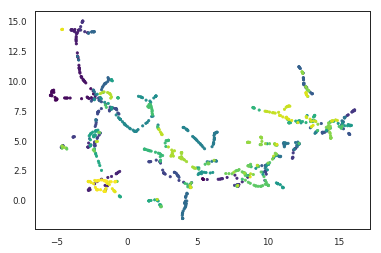

In [58]:
plt.scatter(umaped.embedding_[:, 0], umaped.embedding_[:, 1],c=colors, s= 5, cmap='viridis')

In [59]:
umaped = umap.UMAP(n_components=2).fit(merlin_as)

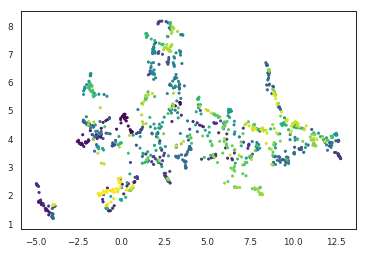

In [60]:
plt.scatter(umaped.embedding_[:, 0], umaped.embedding_[:, 1],c=colors, s= 5, cmap='viridis')

In [37]:
umaped = umap.UMAP(n_neighbors=5, n_components=2,random_state=42).fit(img_data)

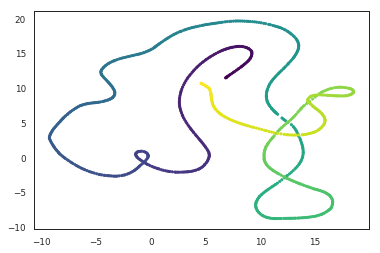

In [45]:
from matplotlib import pyplot as plt
plt.scatter(umaped.embedding_[:, 0], umaped.embedding_[:, 1],c=colors, s= 5, cmap='viridis')

In [46]:
umaped = umap.UMAP(n_components=2).fit(img_data)

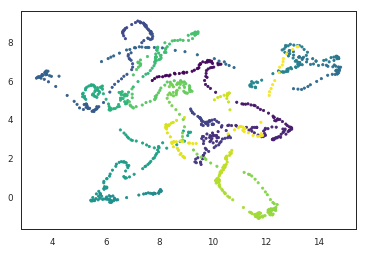

In [47]:
plt.scatter(umaped.embedding_[:, 0], umaped.embedding_[:, 1],c=colors, s= 5, cmap='viridis')

In [9]:
char_id_bin = np.where(char_id <= 0.2, 0, 1)

In [10]:
speech_bin = np.where(speech <= 0.2, 0, 1)

In [11]:
music_bin = np.where(music <= 0.2, 0, 1)

In [12]:
music_speech = np.vstack((music_bin,speech_bin))

In [13]:
df_char = pd.DataFrame(char_id_bin)

In [14]:
df_speech = pd.DataFrame(speech_bin,columns=['Speech'])
df_music = pd.DataFrame(music_bin,columns=['Music'])
df_music_speech = pd.DataFrame(music_speech.T,columns=['Music','Speech'])

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: UMAP(dens_frac=0.0, dens_lambda=0.0)
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (1009, 91282)

..Projecting data using: 
	UMAP(dens_frac=0.0, dens_lambda=0.0, verbose=1)

UMAP(dens_frac=0.0, dens_lambda=0.0, verbose=1)
Construct fuzzy simplicial set
Tue Jun 15 08:52:15 2021 Finding Nearest Neighbors
Tue Jun 15 08:52:17 2021 Finished Nearest Neighbor Search
Tue Jun 15 08:52:20 2021 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Tue Jun 15 08:52:24 2021 Finished embedding

..Scaling with: MinMaxScaler()

Mapping on data shaped (1009, 91282) using lens shaped (1009, 2)

Creating 100 hypercubes.

Created 77

label,group,value,row_count
meta-column-0,0,508536,1009


label,group,value,row_count
Speech,0,441,1009


Already serving localhost:None 
[Force Graph] file:///rdma/vast-rdma/vast/gablab/jsmentch/projects/speech_face_analysis/notebooks/../visuals/dyneusr/dyneusr_wb_umap_merlin_sub21_speech_.html


DyNeuGraph()

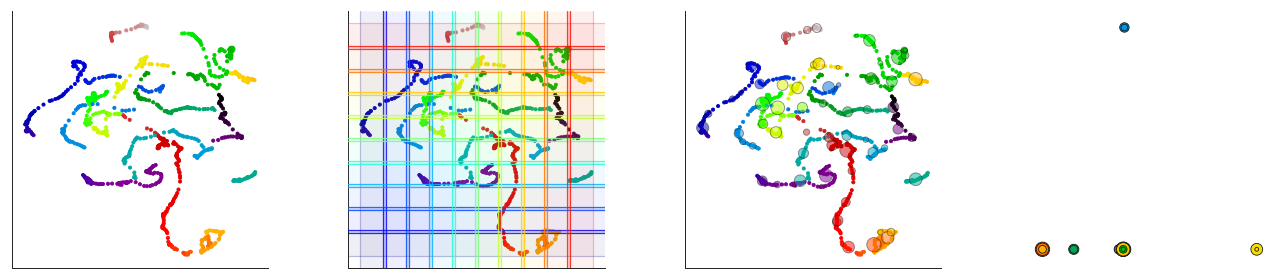

In [15]:
title = 'wb_umap_merlin_sub21_speech'
data = img_data
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data

#lens
#projected_data = mapper.fit_transform(data, projection=TSNE(2), distance_matrix=True)
projected_data = mapper.fit_transform(data, projection=umap.UMAP(n_components=2))
#projected_data = mapper.fit_transform(data, projection=TSNE(2))

# Create dictionary called 'graph' with nodes, edges and meta-information
#graph = mapper.map(projected_data, data, clusterer=sklearn.cluster.DBSCAN(eps=0.5,min_samples=3))
graph = mapper.map(projected_data, data, clusterer=optimize_dbscan(data, k=3, p=100.0))
html = mapper.visualize(graph, path_html='../visuals/dyneusr/kmapper_'+title+'.html',
                 title=title)#,custom_tooltips=labels)
# jupyter.display(path_html="all_features_mean_dcorr_umap.html")

fig, axes = visualize_mapper_stages(data, np.arange(data.shape[0]), lens=projected_data, graph=graph, cover=mapper.cover, layout="spectral")
# Visualize the shape graph using DyNeuSR's DyNeuGraph                          
dG = DyNeuGraph(G=graph, y=df_speech)
dG.visualize('../visuals/dyneusr/dyneusr_'+title+'_.html')

In [16]:
graph

{'nodes': defaultdict(list,
             {'cube0_cluster0': [846,
               847,
               848,
               849,
               850,
               851,
               852,
               853,
               854,
               855,
               856,
               857,
               858,
               859,
               860,
               861,
               862,
               863,
               864,
               865,
               866,
               867,
               868,
               869,
               870,
               871,
               872,
               873,
               874,
               875],
              'cube1_cluster0': [836,
               837,
               838,
               839,
               840,
               841,
               842,
               843,
               844,
               845,
               846],
              'cube2_cluster0': [717, 718, 719, 720, 721, 722, 723],
              'cube3_cluster0': [721,
       

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: UMAP(dens_frac=0.0, dens_lambda=0.0)
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (1009, 521)

..Projecting data using: 
	UMAP(dens_frac=0.0, dens_lambda=0.0, verbose=1)

UMAP(dens_frac=0.0, dens_lambda=0.0, verbose=1)
Construct fuzzy simplicial set
Mon Jun 14 15:05:46 2021 Finding Nearest Neighbors
Mon Jun 14 15:05:47 2021 Finished Nearest Neighbor Search
Mon Jun 14 15:05:47 2021 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Mon Jun 14 15:05:52 2021 Finished embedding

..Scaling with: MinMaxScaler()

Mapping on data shaped (1009, 521) using lens shaped (1009, 2)

Creating 100 hypercubes.

Created 72 edg

label,group,value,row_count
meta-column-0,0,508536,1009


label,group,value,row_count
Speech,0,441,1009


Already serving localhost:None 
[Force Graph] file:///rdma/vast-rdma/vast/gablab/jsmentch/projects/speech_face_analysis/notebooks/../visuals/dyneusr/dyneusr_umap_merlin_audioset_.html


DyNeuGraph()

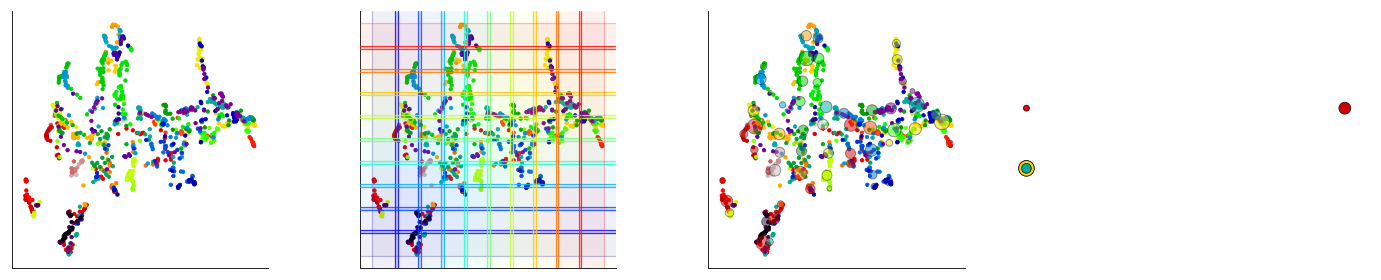

In [14]:
title = 'umap_merlin_audioset'
data = merlin_as
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data

#lens
#projected_data = mapper.fit_transform(data, projection=TSNE(2), distance_matrix=True)
projected_data = mapper.fit_transform(data, projection=umap.UMAP(n_components=2))
#projected_data = mapper.fit_transform(data, projection=TSNE(2))

# Create dictionary called 'graph' with nodes, edges and meta-information
#graph = mapper.map(projected_data, data, clusterer=sklearn.cluster.DBSCAN(eps=0.5,min_samples=3))
graph = mapper.map(projected_data, data, clusterer=optimize_dbscan(data, k=3, p=100.0))
html = mapper.visualize(graph, path_html='../visuals/dyneusr/kmapper_'+title+'.html',
                 title=title)#,custom_tooltips=labels)
# jupyter.display(path_html="all_features_mean_dcorr_umap.html")

fig, axes = visualize_mapper_stages(data, np.arange(data.shape[0]), lens=projected_data, graph=graph, cover=mapper.cover, layout="spectral")
# Visualize the shape graph using DyNeuSR's DyNeuGraph                          
dG = DyNeuGraph(G=graph, y=df_speech)
dG.visualize('../visuals/dyneusr/dyneusr_'+title+'_.html')

In [48]:
dG = DyNeuGraph(G=graph, y=df_music_speech)
dG.visualize('../visuals/dyneusr/dyneusr_'+title+'_music.html')

label,group,value,row_count
Music,0,518,1009
Speech,1,441,1009


Already serving localhost:None 
[Force Graph] file:///rdma/vast-rdma/vast/gablab/jsmentch/projects/speech_face_analysis/notebooks/../visuals/dyneusr/dyneusr_umap_merlin_audioset_music.html


DyNeuGraph()